### Import Libraries

In [6]:
#conda create -n venv_name
#conda activate venv_name
#conda install pip
#pip install pandas
#pip install ipykernel
#pip install ...

#conda install python=3.6
#pip install tensorflow

#pip install pipreqs
#pipreqs /path/to/project

In [7]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [8]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print("=" * 80)
print("📊 DATASET SHAPE INFORMATION")
print("=" * 80)
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

📊 DATASET SHAPE INFORMATION
Training set shape: (42000, 785)
Test set shape: (28000, 784)
Sample submission shape: (28000, 2)


### Exploratory Analysis

In [9]:
# Display first few rows
print("\n" + "=" * 80)
print("📋 FIRST 5 ROWS OF TRAINING DATA")
print("=" * 80)
print(train_df.head())

# Data types and memory usage
print("\n" + "=" * 80)
print("💾 DATA TYPES AND MEMORY USAGE")
print("=" * 80)
print(train_df.info())

# Check for missing values
print("\n" + "=" * 80)
print("❓ MISSING VALUES CHECK")
print("=" * 80)
print(f"Missing values in training set: {train_df.isnull().sum().sum()}")
print(f"Missing values in test set: {test_df.isnull().sum().sum()}")


📋 FIRST 5 ROWS OF TRAINING DATA
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783

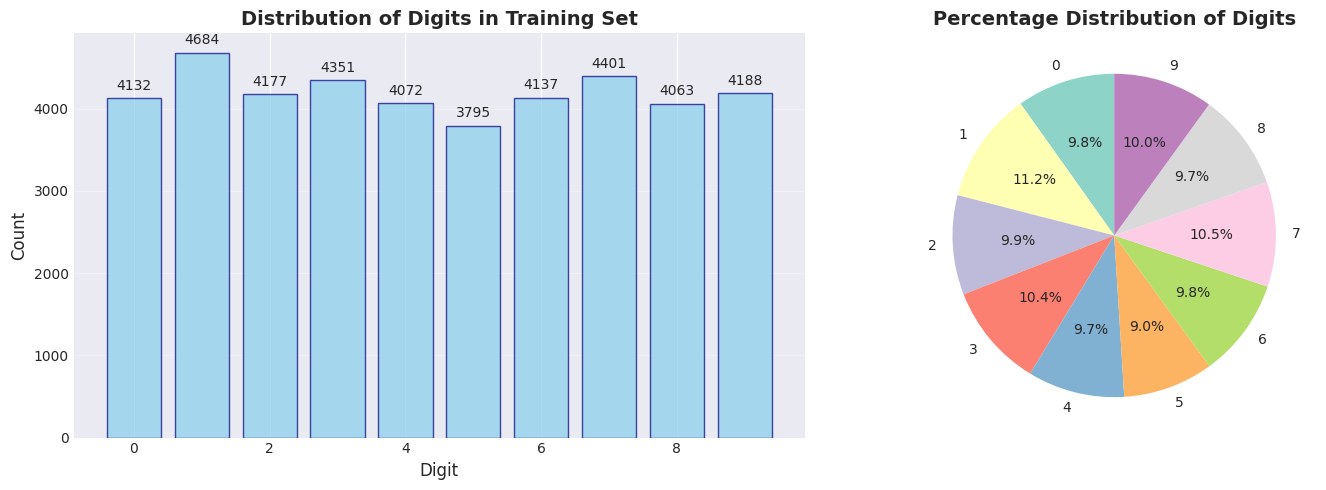


📊 DIGIT DISTRIBUTION STATISTICS
Mean count per digit: 4200.00
Standard deviation: 237.09
Most common digit: 1 (appears 4684 times)
Least common digit: 5 (appears 3795 times)
Distribution balance: 81.02%


In [10]:
# Analyze the distribution of digits
digit_counts = train_df['label'].value_counts().sort_index()

# Create a comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
axes[0].bar(digit_counts.index, digit_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_xlabel('Digit', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Digits in Training Set', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(digit_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontsize=10)

# Pie chart
colors = plt.cm.Set3(range(10))
axes[1].pie(digit_counts.values, labels=digit_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution of Digits', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n" + "=" * 80)
print("📊 DIGIT DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"Mean count per digit: {digit_counts.mean():.2f}")
print(f"Standard deviation: {digit_counts.std():.2f}")
print(f"Most common digit: {digit_counts.idxmax()} (appears {digit_counts.max()} times)")
print(f"Least common digit: {digit_counts.idxmin()} (appears {digit_counts.min()} times)")
print(f"Distribution balance: {(digit_counts.min() / digit_counts.max() * 100):.2f}%")

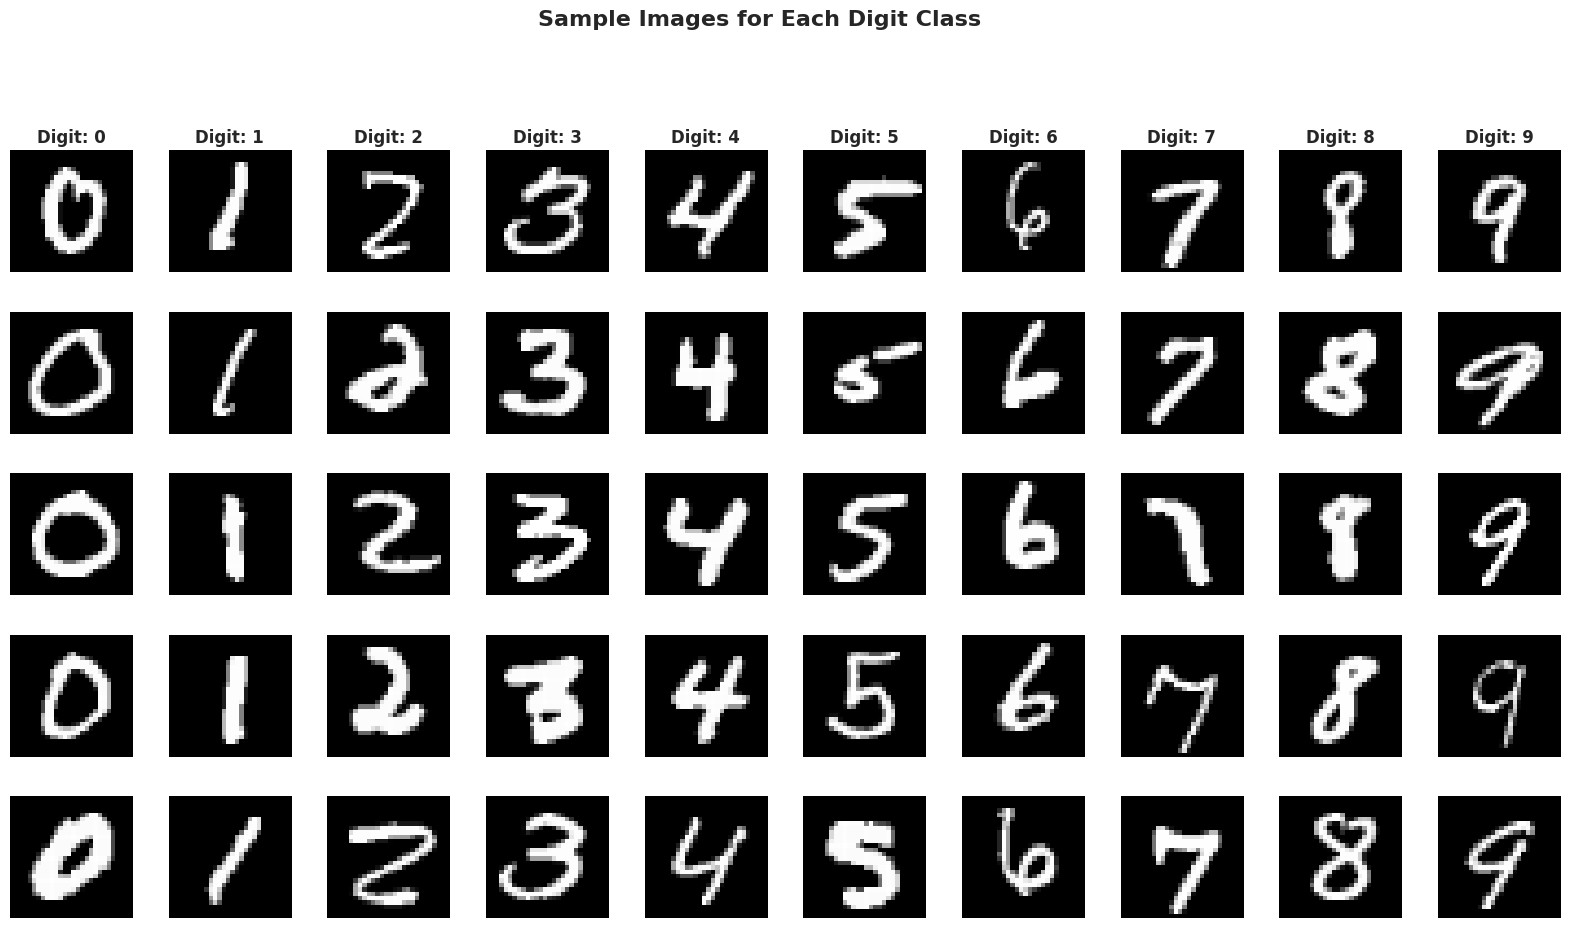

In [11]:
# Separate features and labels
X = train_df.drop('label', axis=1).values
y = train_df['label'].values

# Reshape data for visualization
X_reshaped = X.reshape(-1, 28, 28)

# Create a grid of sample images
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(5, 10, figure=fig, hspace=0.3, wspace=0.3)

for digit in range(10):
    # Get indices of current digit
    digit_indices = np.where(y == digit)[0]
    
    for i in range(5):
        ax = fig.add_subplot(gs[i, digit])
        idx = np.random.choice(digit_indices)
        ax.imshow(X_reshaped[idx], cmap='gray')
        ax.axis('off')
        if i == 0:
            ax.set_title(f'Digit: {digit}', fontsize=12, fontweight='bold')

plt.suptitle('Sample Images for Each Digit Class', fontsize=16, fontweight='bold', y=1.02)
plt.show()

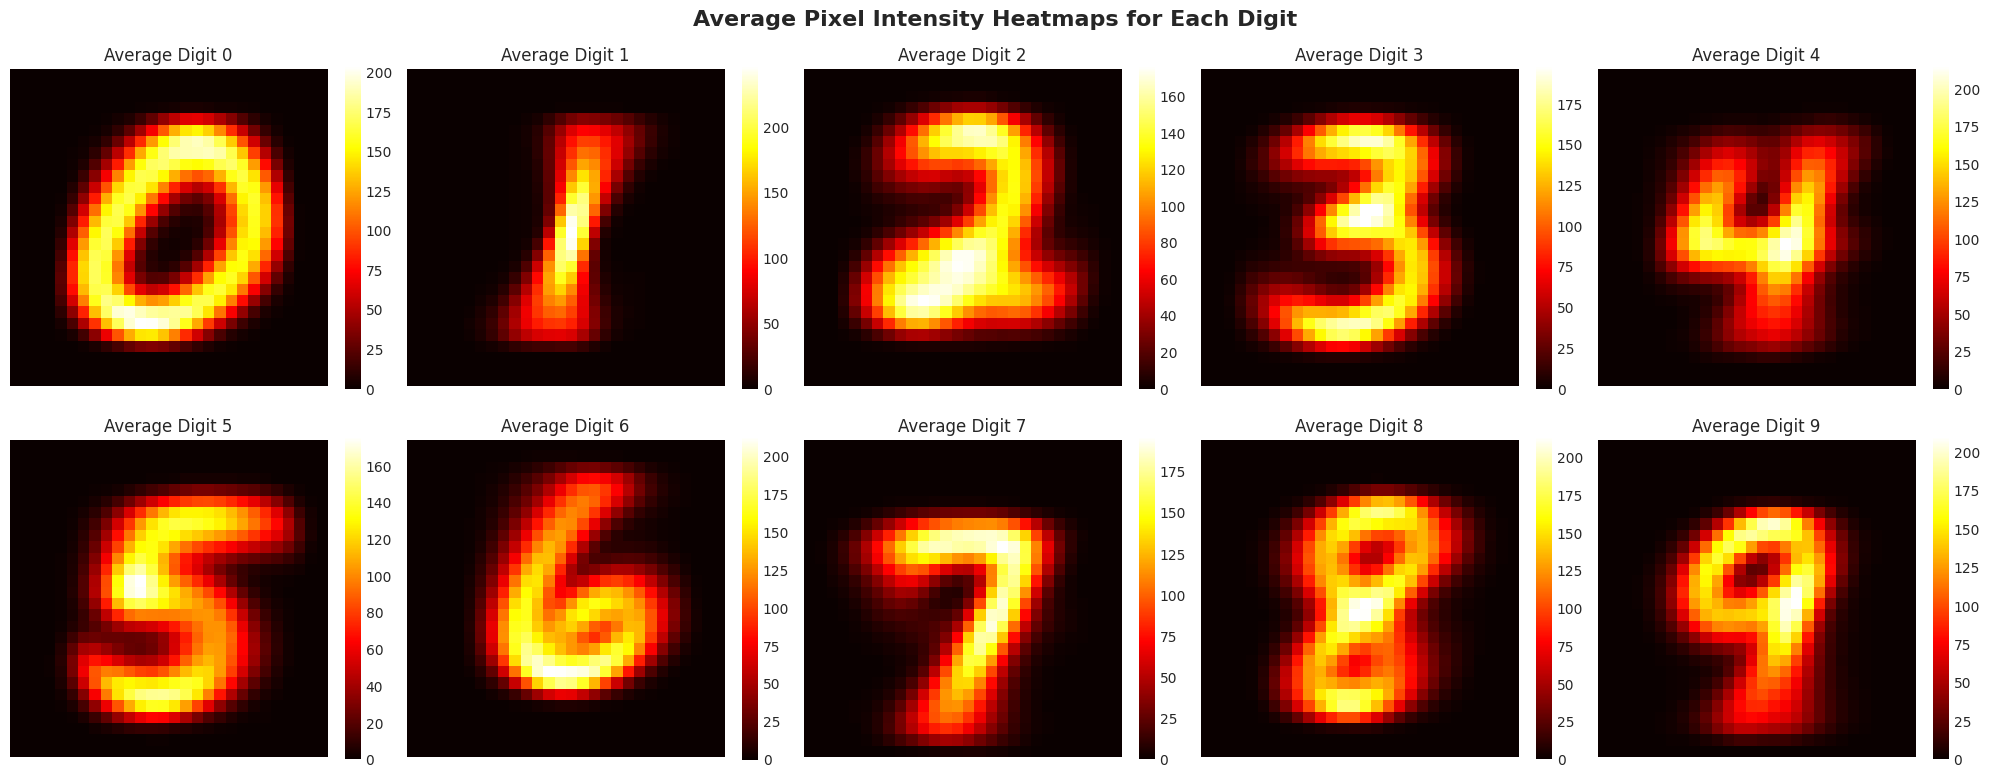

In [12]:
# Calculate average pixel intensity for each digit
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for digit in range(10):
    # Get all images of current digit
    digit_images = X_reshaped[y == digit]
    # Calculate mean image
    mean_image = np.mean(digit_images, axis=0)
    
    # Plot
    im = axes[digit].imshow(mean_image, cmap='hot')
    axes[digit].set_title(f'Average Digit {digit}', fontsize=12)
    axes[digit].axis('off')
    plt.colorbar(im, ax=axes[digit], fraction=0.046)

plt.suptitle('Average Pixel Intensity Heatmaps for Each Digit', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

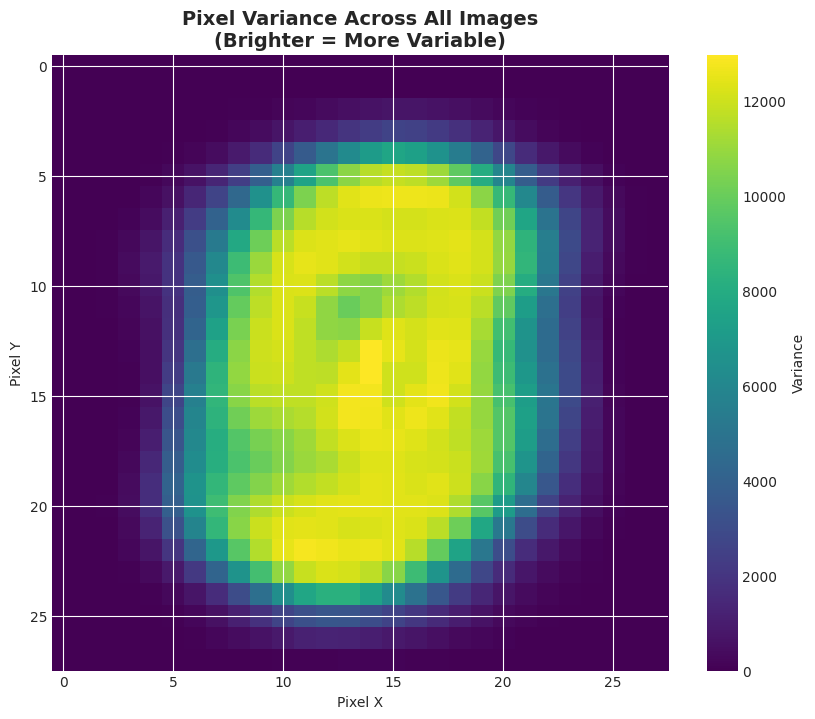

Maximum pixel variance: 12961.55
Minimum pixel variance: 0.00
Average pixel variance: 4380.02


In [13]:
# Analyze which pixels vary the most
pixel_variance = np.var(X, axis=0).reshape(28, 28)

plt.figure(figsize=(10, 8))
plt.imshow(pixel_variance, cmap='viridis')
plt.colorbar(label='Variance')
plt.title('Pixel Variance Across All Images\n(Brighter = More Variable)', fontsize=14, fontweight='bold')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

print(f"Maximum pixel variance: {pixel_variance.max():.2f}")
print(f"Minimum pixel variance: {pixel_variance.min():.2f}")
print(f"Average pixel variance: {pixel_variance.mean():.2f}")